# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [2]:
#create path
path = r'C:\Users\smerg\Instacart Grocery Basket Analysis'
# imporing new merged data with customers
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_cust_merged_data.pkl'))

In [3]:
instacart.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [4]:
# Dropping PII columns
instacart = instacart.drop(columns=['first_name', 'surname'])

# Verify that PII columns are removed
instacart.head()


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Low spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Low spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


In [5]:
# Define a function to map states to regions
def get_region(state):
    if state in ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']:
        return 'Midwest'
    elif state in ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']:
        return 'South'
    elif state in ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']:
        return 'West'
    else:
        return 'Other'

# Apply the function to create the region column
instacart['Region'] = instacart['state'].apply(get_region)

# Verify the new column
instacart[['state', 'Region']].head()


,state,Region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest


In [6]:
# Cross-tabulation of spending_flag and Region
region_spending = pd.crosstab(instacart['Region'], instacart['spending_flag'], normalize='index')

# Display the result
print(region_spending)



spending_flag  High spender  Low spender
Region                                  
Midwest            0.020875     0.979125
Northeast          0.018705     0.981295
Other              0.022000     0.978000
South              0.019105     0.980895
West               0.018871     0.981129


In [7]:
# Create the exclusion flag
instacart['exclusion_flag'] = instacart['max_order'] < 5

In [8]:
# Filter out the excluded customers
instacart_filtered = instacart[instacart['exclusion_flag'] == False]

In [9]:
# Export the filtered data
instacart_filtered.to_csv(os.path.join(path, '02 Data','Prepared Data', 'instacart_filtered.csv'))

In [10]:
# Create the 'Single Adult' profile
single_adult_mask = (instacart_filtered['age'] < 30) & (instacart_filtered['income'] < 50000) & (instacart_filtered['number_of_dependants'] == 0)

# Create the 'Young Parent' profile
young_parent_mask = (instacart_filtered['age'] < 40) & (instacart_filtered['income'] > 50000) & (instacart_filtered['number_of_dependants'] > 0)

# Create the 'Senior' profile
senior_mask = instacart_filtered['age'] > 60

# Define conditions and corresponding profile names
conditions = [
    single_adult_mask,
    young_parent_mask,
    senior_mask
]

choices = [
    'Single Adult',
    'Young Parent',
    'Senior'
]

# Apply the conditions to create the 'profile' column
instacart_filtered['profile'] = np.select(conditions, choices, default='Other')


C:\Users\smerg\AppData\Local\Temp\ipykernel_9204\1801729958.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_filtered['profile'] = np.select(conditions, choices, default='Other')


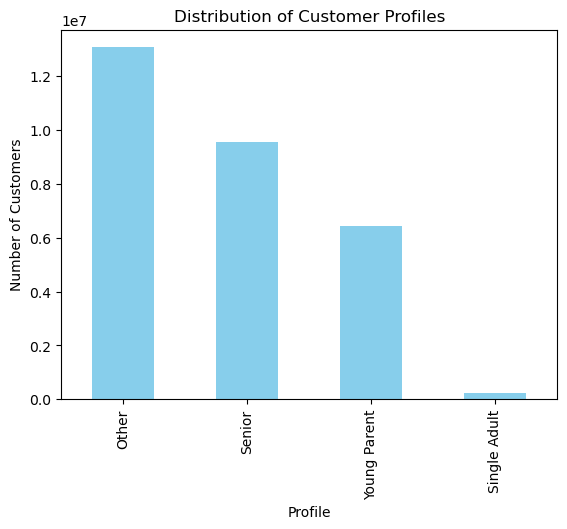

In [11]:
# Plot the distribution of profiles
instacart_filtered['profile'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')
plt.show()


In [12]:
# Aggregating data
profile_aggregation = instacart_filtered.groupby('profile').agg({
    'max_order': ['max', 'mean', 'min'],
    'avg_price': ['max', 'mean', 'min']
})

# Display the results
print(profile_aggregation)


             max_order                    avg_price                     
                   max       mean min           max       mean       min
profile                                                                 
Other               99  34.143694   5  15006.940000  11.612840  1.000000
Senior              99  34.359072   5  14042.512281  11.670444  1.262500
Single Adult        99  32.202806   5     13.878571   6.893750  2.100000
Young Parent        99  34.970139   5  10209.987755  12.850018  6.998039


In [13]:
# Cross-tabulation of profiles and regions
profile_region = pd.crosstab(instacart_filtered['profile'], instacart_filtered['Region'])

# Cross-tabulation of profiles and departments
profile_department = pd.crosstab(instacart_filtered['profile'], instacart_filtered['department_id'])

# Display the results
print(profile_region)
print(profile_department)


Region        Midwest  Northeast   Other    South     West
profile                                                   
Other         3107515    2275958  239910  4098628  3349015
Senior        2225816    1721138  182723  2995101  2436848
Single Adult    52906      42864    3393    61765    56773
Young Parent  1473856    1138277  123589  2042174  1643741
department_id      1      2       3        4      5       6        7      8   \
profile                                                                        
Other          890046  14340  471191  3791884  62760  107683  1116539  39121   
Senior         658628  10375  345609  2807505  43014   77918   798951  28811   
Single Adult    14243    289    7294    51953   1126    1729    23249    607   
Young Parent   443508   7271  235732  1935009  31086   54769   491918  19314   

department_id      9      10  ...      12      13      14      15       16  \
profile                       ...                                            
Other    

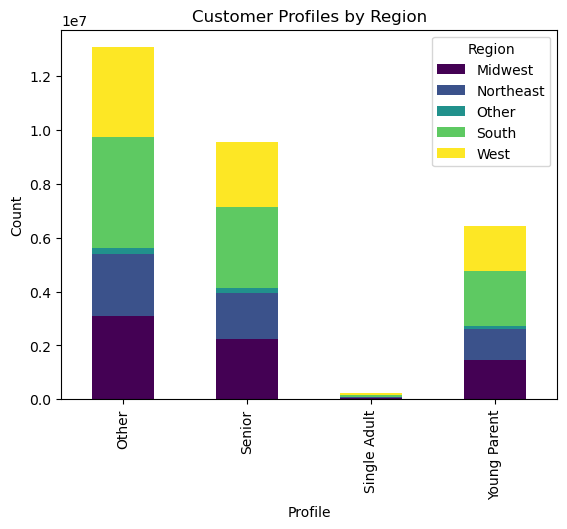

In [14]:
# Visualize profile distribution by region
profile_region.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Customer Profiles by Region')
plt.xlabel('Profile')
plt.ylabel('Count')
plt.show()


In [16]:
# Export the final filtered data
instacart_filtered.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_filtered.csv'), index=False)


## Making Visualizations

In [19]:
instacart_filtered.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,gender,state,age,date_joined,number_of_dependants,family_status,income,Region,exclusion_flag,profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,False,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,False,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,False,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Female,Hawaii,51,1/4/2019,2,married,57797,West,False,Other
6,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,False,Senior


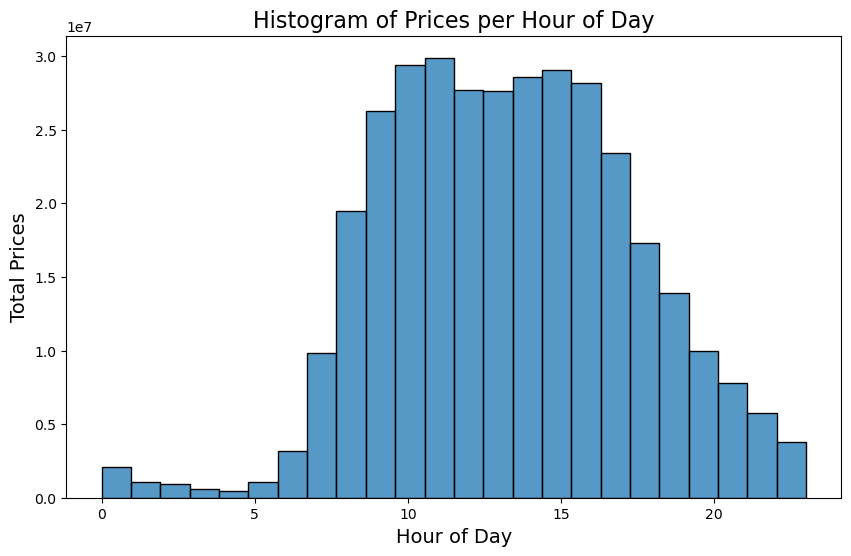

In [24]:
# Assuming instacart_filtered is your DataFrame
plt.figure(figsize=(10, 6))

# Use seaborn to create a histogram
sns.histplot(data=instacart_filtered, x='order_hour_of_day', weights='prices', bins=24, kde=False)

# Adding titles and labels
plt.title('Histogram of Prices per Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Prices', fontsize=14)

# Display the plot
plt.show()


In [25]:
# Group by the order hour and calculate the average price
avg_prices_per_hour = instacart_filtered.groupby('order_hour_of_day')['prices'].mean()


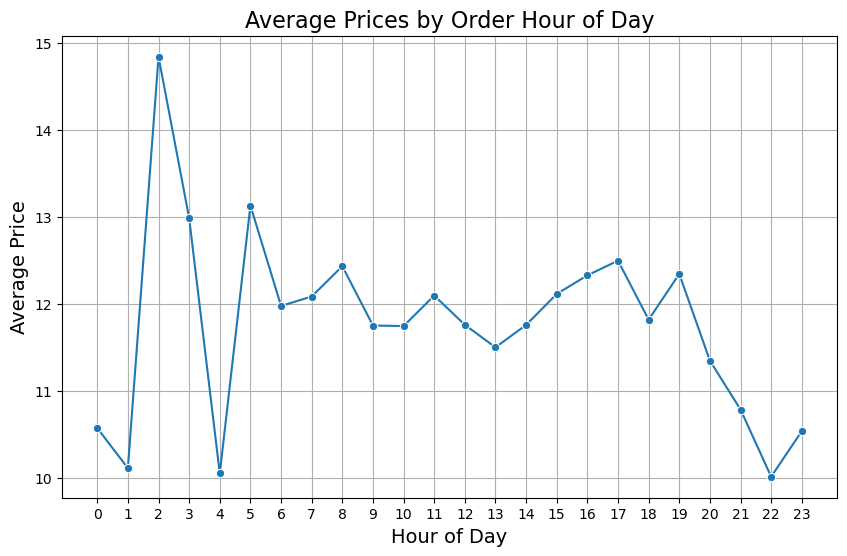

In [26]:
plt.figure(figsize=(10, 6))

# Create the line plot using seaborn
sns.lineplot(x=avg_prices_per_hour.index, y=avg_prices_per_hour.values, marker='o')

# Add titles and labels
plt.title('Average Prices by Order Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

# Display the plot
plt.xticks(range(0, 24))  # Ensures all hours are displayed on the x-axis
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [29]:
# Count the occurrences of each product
top_products = instacart_filtered['product_name'].value_counts().head(10)


C:\Users\smerg\AppData\Local\Temp\ipykernel_9204\3132029906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


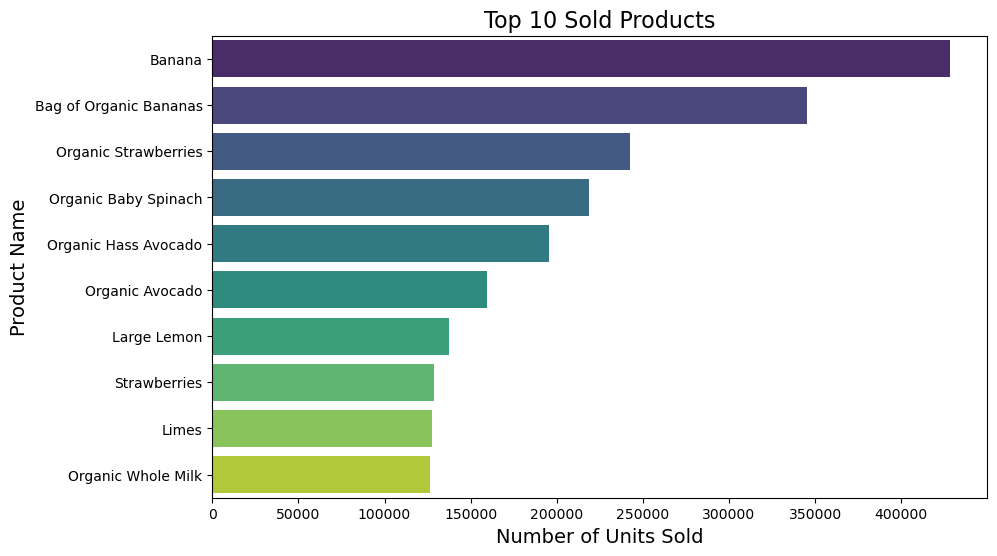

In [30]:
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Add titles and labels
plt.title('Top 10 Sold Products', fontsize=16)
plt.xlabel('Number of Units Sold', fontsize=14)
plt.ylabel('Product Name', fontsize=14)

# Display the plot
plt.show()


In [56]:
# Example dictionary for mapping department_id to department_name
department_mapping = {
    1: 'Produce',
    2: 'Dairy',
    3: 'Bakery',
    # Add all your mappings here
}

# Map department_id to department_name in instacart_filtered
instacart_filtered['department_name'] = instacart_filtered['department_id'].map(department_mapping)


C:\Users\smerg\AppData\Local\Temp\ipykernel_9204\1119219155.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_filtered['department_name'] = instacart_filtered['department_id'].map(department_mapping)


In [58]:
# Example data for department_id and department_name
data = {
    'department_id': [1, 2, 3, 4],  # Add all relevant department_ids
    'department_name': ['Produce', 'Dairy', 'Bakery', 'Frozen']  # Corresponding department names
}

# Create the departments DataFrame
departments = pd.DataFrame(data)

In [65]:
# Assuming you have a 'department_id' and 'department_name' in your DataFrame
# Group by 'department_id' and count the number of orders
orders_by_department = instacart_filtered.groupby('department_id')['order_id'].count()

# If you have department names, join the department names for better visualization
# Assuming you have a DataFrame 'departments' with 'department_id' and 'department_name'
# departments = pd.DataFrame({'department_id': [...], 'department_name': [...]})

# Merge to get department names
# orders_by_department = orders_by_department.reset_index().merge(departments, on='department_id')

# If 'department_name' is already in 'instacart_filtered'
orders_by_department = instacart_filtered.groupby('department_id')['order_id'].count().reset_index()
orders_by_department = orders_by_department.merge(instacart_filtered[['department_id', 'department_name']].drop_duplicates(), on='department_id')


MemoryError: Unable to allocate 223. MiB for an array with shape (29271990,) and data type int64

C:\Users\smerg\AppData\Local\Temp\ipykernel_9204\1603768031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_frequency_by_department.values, y=order_frequency_by_department.index, orient='h', palette='viridis')


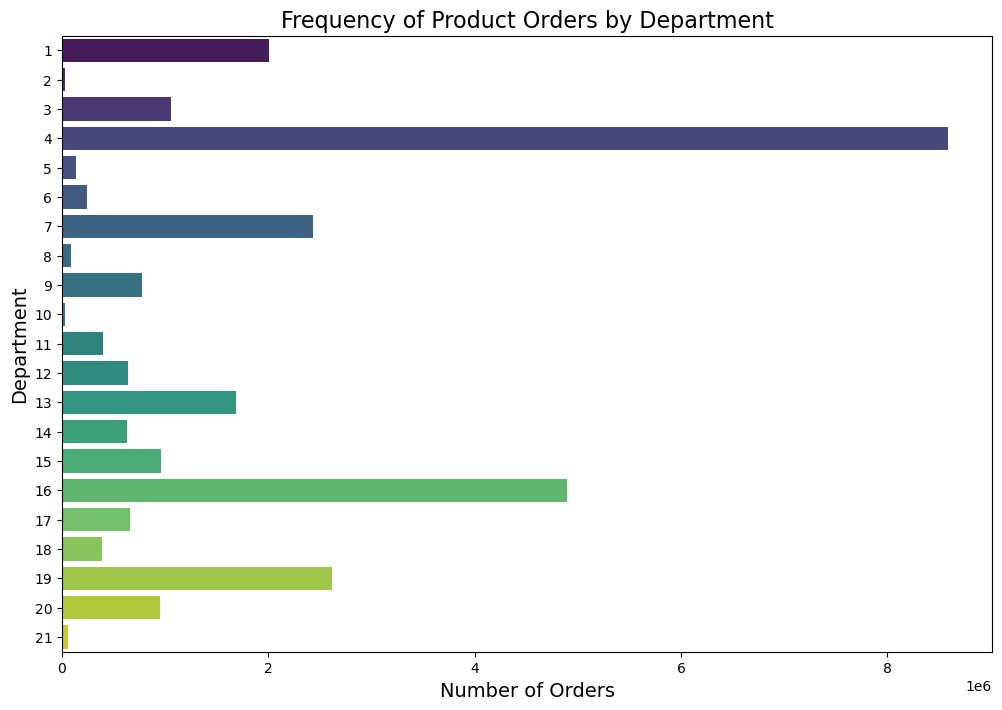

In [64]:
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.barplot(x=order_frequency_by_department.values, y=order_frequency_by_department.index, orient='h', palette='viridis')

# Add titles and labels
plt.title('Frequency of Product Orders by Department', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Department', fontsize=14)

# Display the plot
plt.show()
